**RFM Analysis in Retail Data**

Introduction

RFM stands for “Recency, Frequency, Monetary” and is a way to figure out who your most valuable customers are. Recency is how recently a customer has transacted with a brand, Frequency is how frequently they’ve engaged with a brand, and Monetary is how much money they’ve spent on a brand’s products and services. In this project, we will analyze retail data to find out 'RFM' and finally find out which one is the valuable customer, so that we can treat them differently. 

Purposes:

1. Find out how many 'low value customer', 'high value customer', dan 'normal value customer'

Phases:
1. Data Overview
2. Pre-processing Data
3. RFM analysis



1. Data Overview

In [ ]:
import pandas as pd
import datetime as dt

In [ ]:
df = pd.read_excel('https://archive.ics.uci.edu/ml/machine-learning-databases/00352/Online%20Retail.xlsx')
df.head()

,InvoiceNo,StockCode,Description,Quantity,InvoiceDate,UnitPrice,CustomerID,Country
0,536365,85123A,WHITE HANGING HEART T-LIGHT HOLDER,6,2010-12-01 08:26:00,2.55,17850.0,United Kingdom
1,536365,71053,WHITE METAL LANTERN,6,2010-12-01 08:26:00,3.39,17850.0,United Kingdom
2,536365,84406B,CREAM CUPID HEARTS COAT HANGER,8,2010-12-01 08:26:00,2.75,17850.0,United Kingdom
3,536365,84029G,KNITTED UNION FLAG HOT WATER BOTTLE,6,2010-12-01 08:26:00,3.39,17850.0,United Kingdom
4,536365,84029E,RED WOOLLY HOTTIE WHITE HEART.,6,2010-12-01 08:26:00,3.39,17850.0,United Kingdom


In [ ]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 541909 entries, 0 to 541908
Data columns (total 8 columns):
 #   Column       Non-Null Count   Dtype         
---  ------       --------------   -----         
 0   InvoiceNo    541909 non-null  object        
 1   StockCode    541909 non-null  object        
 2   Description  540455 non-null  object        
 3   Quantity     541909 non-null  int64         
 4   InvoiceDate  541909 non-null  datetime64[ns]
 5   UnitPrice    541909 non-null  float64       
 6   CustomerID   406829 non-null  float64       
 7   Country      541909 non-null  object        
dtypes: datetime64[ns](1), float64(2), int64(1), object(4)
memory usage: 33.1+ MB


there is null values in Customer ID column

In [ ]:
df.describe()

,Quantity,UnitPrice,CustomerID
count,541909.000000,541909.000000,406829.000000
mean,9.552250,4.611114,15287.690570
std,218.081158,96.759853,1713.600303
min,-80995.000000,-11062.060000,12346.000000
25%,1.000000,1.250000,13953.000000
50%,3.000000,2.080000,15152.000000
75%,10.000000,4.130000,16791.000000
max,80995.000000,38970.000000,18287.000000


in Quantity column and Unit Price column there are negative data which are abnormal, that will be looked deeper 

2. Pre-processing Data

In [ ]:
df[df['CustomerID'].notnull()]
df = df[df['CustomerID'].notnull()]

the missing values in Customer ID column will be erased

In [ ]:
df['CustomerID'].astype(int).astype(str)
df['CustomerID'] = df['CustomerID'].astype(int).astype(str)

the customer ID type is float, since the customer ID column is not numeric, so we should change it into string

In [ ]:
df['TotalPrice'] = df['Quantity'] * df['UnitPrice']


we need the values of the sales, so we will create total price column

In [ ]:
df.head()

,InvoiceNo,StockCode,Description,Quantity,InvoiceDate,UnitPrice,CustomerID,Country,TotalPrice
0,536365,85123A,WHITE HANGING HEART T-LIGHT HOLDER,6,2010-12-01 08:26:00,2.55,17850,United Kingdom,15.30
1,536365,71053,WHITE METAL LANTERN,6,2010-12-01 08:26:00,3.39,17850,United Kingdom,20.34
2,536365,84406B,CREAM CUPID HEARTS COAT HANGER,8,2010-12-01 08:26:00,2.75,17850,United Kingdom,22.00
3,536365,84029G,KNITTED UNION FLAG HOT WATER BOTTLE,6,2010-12-01 08:26:00,3.39,17850,United Kingdom,20.34
4,536365,84029E,RED WOOLLY HOTTIE WHITE HEART.,6,2010-12-01 08:26:00,3.39,17850,United Kingdom,20.34


In [ ]:
df[df['Quantity']<0]

,InvoiceNo,StockCode,Description,Quantity,InvoiceDate,UnitPrice,CustomerID,Country,TotalPrice
141,C536379,D,Discount,-1,2010-12-01 09:41:00,27.50,14527,United Kingdom,-27.50
154,C536383,35004C,SET OF 3 COLOURED FLYING DUCKS,-1,2010-12-01 09:49:00,4.65,15311,United Kingdom,-4.65
235,C536391,22556,PLASTERS IN TIN CIRCUS PARADE,-12,2010-12-01 10:24:00,1.65,17548,United Kingdom,-19.80
236,C536391,21984,PACK OF 12 PINK PAISLEY TISSUES,-24,2010-12-01 10:24:00,0.29,17548,United Kingdom,-6.96
237,C536391,21983,PACK OF 12 BLUE PAISLEY TISSUES,-24,2010-12-01 10:24:00,0.29,17548,United Kingdom,-6.96
...,...,...,...,...,...,...,...,...,...
540449,C581490,23144,ZINC T-LIGHT HOLDER STARS SMALL,-11,2011-12-09 09:57:00,0.83,14397,United Kingdom,-9.13
541541,C581499,M,Manual,-1,2011-12-09 10:28:00,224.69,15498,United Kingdom,-224.69
541715,C581568,21258,VICTORIAN SEWING BOX LARGE,-5,2011-12-09 11:57:00,10.95,15311,United Kingdom,-54.75
541716,C581569,84978,HANGING HEART JAR T-LIGHT HOLDER,-1,2011-12-09 11:58:00,1.25,17315,United Kingdom,-1.25


there are 8905 negative data in quantity also contain special letter 'C' in InvoiceNo, we will look deeper

In [ ]:
df[df['InvoiceNo'].str.contains('C', na=False)]

,InvoiceNo,StockCode,Description,Quantity,InvoiceDate,UnitPrice,CustomerID,Country,TotalPrice
141,C536379,D,Discount,-1,2010-12-01 09:41:00,27.50,14527,United Kingdom,-27.50
154,C536383,35004C,SET OF 3 COLOURED FLYING DUCKS,-1,2010-12-01 09:49:00,4.65,15311,United Kingdom,-4.65
235,C536391,22556,PLASTERS IN TIN CIRCUS PARADE,-12,2010-12-01 10:24:00,1.65,17548,United Kingdom,-19.80
236,C536391,21984,PACK OF 12 PINK PAISLEY TISSUES,-24,2010-12-01 10:24:00,0.29,17548,United Kingdom,-6.96
237,C536391,21983,PACK OF 12 BLUE PAISLEY TISSUES,-24,2010-12-01 10:24:00,0.29,17548,United Kingdom,-6.96
...,...,...,...,...,...,...,...,...,...
540449,C581490,23144,ZINC T-LIGHT HOLDER STARS SMALL,-11,2011-12-09 09:57:00,0.83,14397,United Kingdom,-9.13
541541,C581499,M,Manual,-1,2011-12-09 10:28:00,224.69,15498,United Kingdom,-224.69
541715,C581568,21258,VICTORIAN SEWING BOX LARGE,-5,2011-12-09 11:57:00,10.95,15311,United Kingdom,-54.75
541716,C581569,84978,HANGING HEART JAR T-LIGHT HOLDER,-1,2011-12-09 11:58:00,1.25,17315,United Kingdom,-1.25


we will look from InvoiceNo column that contain C, we can also find 8905 negative data in Quantity column

In [ ]:
df[(df['Quantity']<0) & (df['InvoiceNo'].str.contains('C', na=False))]

,InvoiceNo,StockCode,Description,Quantity,InvoiceDate,UnitPrice,CustomerID,Country,TotalPrice
141,C536379,D,Discount,-1,2010-12-01 09:41:00,27.50,14527,United Kingdom,-27.50
154,C536383,35004C,SET OF 3 COLOURED FLYING DUCKS,-1,2010-12-01 09:49:00,4.65,15311,United Kingdom,-4.65
235,C536391,22556,PLASTERS IN TIN CIRCUS PARADE,-12,2010-12-01 10:24:00,1.65,17548,United Kingdom,-19.80
236,C536391,21984,PACK OF 12 PINK PAISLEY TISSUES,-24,2010-12-01 10:24:00,0.29,17548,United Kingdom,-6.96
237,C536391,21983,PACK OF 12 BLUE PAISLEY TISSUES,-24,2010-12-01 10:24:00,0.29,17548,United Kingdom,-6.96
...,...,...,...,...,...,...,...,...,...
540449,C581490,23144,ZINC T-LIGHT HOLDER STARS SMALL,-11,2011-12-09 09:57:00,0.83,14397,United Kingdom,-9.13
541541,C581499,M,Manual,-1,2011-12-09 10:28:00,224.69,15498,United Kingdom,-224.69
541715,C581568,21258,VICTORIAN SEWING BOX LARGE,-5,2011-12-09 11:57:00,10.95,15311,United Kingdom,-54.75
541716,C581569,84978,HANGING HEART JAR T-LIGHT HOLDER,-1,2011-12-09 11:58:00,1.25,17315,United Kingdom,-1.25


when we combined both column, we find exactly 8905 rows, so we can conclude that the abnormal data is symetrical

In [ ]:
df[df['Quantity']>0]
df = df[df['Quantity']>0]

we will erase the abnormal data

In [ ]:
df.head()

,InvoiceNo,StockCode,Description,Quantity,InvoiceDate,UnitPrice,CustomerID,Country,TotalPrice
0,536365,85123A,WHITE HANGING HEART T-LIGHT HOLDER,6,2010-12-01 08:26:00,2.55,17850,United Kingdom,15.30
1,536365,71053,WHITE METAL LANTERN,6,2010-12-01 08:26:00,3.39,17850,United Kingdom,20.34
2,536365,84406B,CREAM CUPID HEARTS COAT HANGER,8,2010-12-01 08:26:00,2.75,17850,United Kingdom,22.00
3,536365,84029G,KNITTED UNION FLAG HOT WATER BOTTLE,6,2010-12-01 08:26:00,3.39,17850,United Kingdom,20.34
4,536365,84029E,RED WOOLLY HOTTIE WHITE HEART.,6,2010-12-01 08:26:00,3.39,17850,United Kingdom,20.34


3. RFM Analysis

we will start to find Recency from the latest purchased item, Frequency from the number of order in InvoiceNo, and Monetary from total price

In [ ]:
df = df.groupby('CustomerID').agg({'InvoiceNo': 'count',
                              'InvoiceDate': 'last',
                              'TotalPrice': 'sum',
}).reset_index()

since the data is an old data so we need to find the latest purchase date, so we can count how many days is the lastest purchase

In [ ]:
df['InvoiceDate'].max()

Timestamp('2011-12-09 12:50:00')

we can assume today is 2011-12-11, so we can get how many days is he latest purchase happenned

In [ ]:
(dt.datetime(2011,12,11,14,0,0) - df['InvoiceDate']).dt.days
df['LastPurchase'] = (dt.datetime(2011,12,11,14,0,0) - df['InvoiceDate']).dt.days

In [ ]:
df.head()

,CustomerID,InvoiceNo,InvoiceDate,TotalPrice,LastPurchase
0,12346,2,2011-01-18 10:17:00,0.00,327
1,12347,182,2011-12-07 15:52:00,4310.00,3
2,12348,31,2011-09-25 13:13:00,1797.24,77
3,12349,73,2011-11-21 09:51:00,1757.55,20
4,12350,17,2011-02-02 16:01:00,334.40,311


recency 

In [ ]:
df['R'] = 1 - df['LastPurchase'] / df['LastPurchase'].max()

frequency

In [ ]:
df['F'] = df['InvoiceNo'] / df['InvoiceNo'].max()

monetary

In [ ]:
df['M'] = df['TotalPrice'] / df['TotalPrice'].max()

In [ ]:
df.head()

,CustomerID,InvoiceNo,InvoiceDate,TotalPrice,LastPurchase,R,F,M
0,12346,2,2011-01-18 10:17:00,0.00,327,0.128000,0.000251,0.000000
1,12347,182,2011-12-07 15:52:00,4310.00,3,0.992000,0.022798,0.015421
2,12348,31,2011-09-25 13:13:00,1797.24,77,0.794667,0.003883,0.006430
3,12349,73,2011-11-21 09:51:00,1757.55,20,0.946667,0.009144,0.006288
4,12350,17,2011-02-02 16:01:00,334.40,311,0.170667,0.002130,0.001196


next we will input the coefisien that determined the RFM values, the coefisien is the best practice used frequently in the industry


In [ ]:
df['RFM'] = 0.15*df['R'] + 0.28*df['F'] + 0.57*df['M']

In [ ]:
df

,CustomerID,InvoiceNo,InvoiceDate,TotalPrice,LastPurchase,R,F,M,RFM
0,12346,2,2011-01-18 10:17:00,0.00,327,0.128000,0.000251,0.000000,0.019270
1,12347,182,2011-12-07 15:52:00,4310.00,3,0.992000,0.022798,0.015421,0.163974
2,12348,31,2011-09-25 13:13:00,1797.24,77,0.794667,0.003883,0.006430,0.123953
3,12349,73,2011-11-21 09:51:00,1757.55,20,0.946667,0.009144,0.006288,0.148145
4,12350,17,2011-02-02 16:01:00,334.40,311,0.170667,0.002130,0.001196,0.026878
...,...,...,...,...,...,...,...,...,...
4367,18280,10,2011-03-07 09:52:00,180.60,279,0.256000,0.001253,0.000646,0.039119
4368,18281,7,2011-06-12 10:53:00,80.82,182,0.514667,0.000877,0.000289,0.077610
4369,18282,13,2011-12-02 11:43:00,176.60,9,0.976000,0.001628,0.000632,0.147216
4370,18283,756,2011-12-06 12:02:00,2094.88,5,0.986667,0.094701,0.007495,0.178789


as now we already have RFM results, now we have to look fro the statistical results to determine the'high value customer'

In [ ]:
df.describe()

,InvoiceNo,TotalPrice,LastPurchase,R,F,M,RFM
count,4372.000000,4372.000000,4372.000000,4372.000000,4372.000000,4372.000000,4372.000000
mean,93.053294,1898.459701,93.217978,0.751419,0.011656,0.006793,0.119848
std,232.471608,8219.345141,100.760405,0.268694,0.029121,0.029408,0.049076
min,1.000000,-4287.630000,2.000000,0.000000,0.000125,-0.015341,-0.001456
25%,17.000000,293.362500,18.000000,0.616000,0.002130,0.001050,0.095672
50%,42.000000,648.075000,51.000000,0.864000,0.005261,0.002319,0.134160
75%,102.000000,1611.725000,144.000000,0.952000,0.012777,0.005767,0.148748
max,7983.000000,279489.020000,375.000000,0.994667,1.000000,1.000000,0.791930


we can see the distribution better in histogram

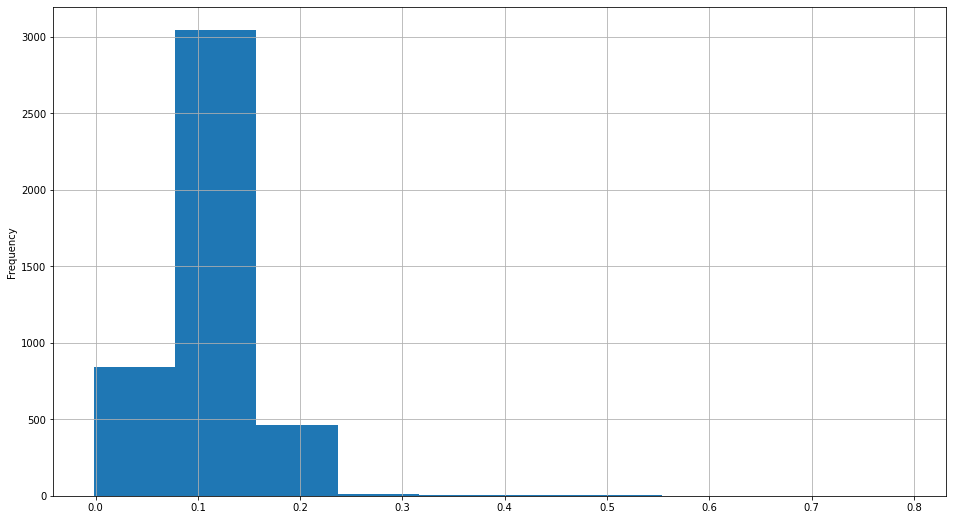

In [ ]:
df['RFM'].plot(kind='hist', figsize=(16,9), grid=True)

creating a function to put a label into different type of customer

In [ ]:
def labeling(x):
  if x < 0.096072:
    return 'Low Value Customer'
  if x > 0.148294:
    return 'High Value Customer'
  else:
    return 'Normal Value Customer'

applying the function into the data and creating the RFM Label column

In [ ]:
df['RFM'].apply(lambda x: labeling(x))
df['RFMLabel'] = df['RFM'].apply(lambda x: labeling(x))

In [ ]:
df

,CustomerID,InvoiceNo,InvoiceDate,TotalPrice,LastPurchase,R,F,M,RFM,RFMLabel
0,12346,2,2011-01-18 10:17:00,0.00,327,0.128000,0.000251,0.000000,0.019270,Low Value Customer
1,12347,182,2011-12-07 15:52:00,4310.00,3,0.992000,0.022798,0.015421,0.163974,High Value Customer
2,12348,31,2011-09-25 13:13:00,1797.24,77,0.794667,0.003883,0.006430,0.123953,Normal Value Customer
3,12349,73,2011-11-21 09:51:00,1757.55,20,0.946667,0.009144,0.006288,0.148145,Normal Value Customer
4,12350,17,2011-02-02 16:01:00,334.40,311,0.170667,0.002130,0.001196,0.026878,Low Value Customer
...,...,...,...,...,...,...,...,...,...,...
4367,18280,10,2011-03-07 09:52:00,180.60,279,0.256000,0.001253,0.000646,0.039119,Low Value Customer
4368,18281,7,2011-06-12 10:53:00,80.82,182,0.514667,0.000877,0.000289,0.077610,Low Value Customer
4369,18282,13,2011-12-02 11:43:00,176.60,9,0.976000,0.001628,0.000632,0.147216,Normal Value Customer
4370,18283,756,2011-12-06 12:02:00,2094.88,5,0.986667,0.094701,0.007495,0.178789,High Value Customer


simplify the result of RFM and it's labelling

In [ ]:
df = df[['R', 'F', 'M', 'RFM', 'RFMLabel']]

In [ ]:
len(df[df['RFMLabel']=='High Value Customer'])

1133

In [ ]:
len(df[df['RFMLabel']=='Normal Value Customer'])

2137

In [ ]:
len(df[df['RFMLabel']=='Low Value Customer'])

1102

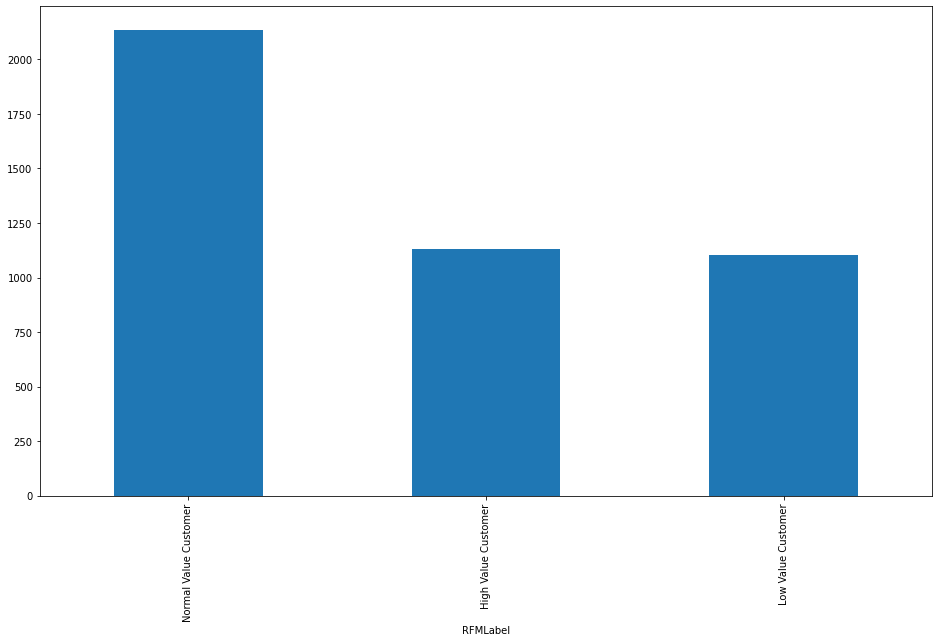

In [ ]:
df.groupby('RFMLabel').size().sort_values(ascending=False).plot(kind='bar', figsize=(16,9))

conclusion:
1. the number of high value customer is 1133 customer, normal customer is 2137 and low value customer is 1102 customer.
2. each and every label of customer should be treated differently